<a href="https://colab.research.google.com/github/Tiziano-Test/Climate-Change-Earth-Surface-Temperature-/blob/main/Climate_Change_Earth_Surface_Temperature_Data_6_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Time-series analysis

Given that the main project dataset already contains time-series data, I can  skip steps 1 and 2 (additional data from Quandl) and jump to step 3. My dataset with global temperatures over time is well-suited for time-series analysis.

Step 1: Upload the Zip File to Colab

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()

# Unzip the uploaded file
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()

Saving Global Land Temperatures By City.zip to Global Land Temperatures By City.zip


Step 2. Load the CSV Files into DataFrames

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Load the CSV files into dataframes
global_temp_by_city = pd.read_csv('GlobalLandTemperaturesByCity.csv')
global_temp_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
global_temp_by_major_city = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
global_temp_by_state = pd.read_csv('GlobalLandTemperaturesByState.csv')
global_temp = pd.read_csv('GlobalTemperatures.csv')

# Display the first few rows of each dataset to understand their structure
print("GlobalLandTemperaturesByCity")
print(global_temp_by_city.head())

print("\nGlobalLandTemperaturesByCountry")
print(global_temp_by_country.head())

print("\nGlobalLandTemperaturesByMajorCity")
print(global_temp_by_major_city.head())

print("\nGlobalLandTemperaturesByState")
print(global_temp_by_state.head())

print("\nGlobalTemperatures")
print(global_temp.head())


GlobalLandTemperaturesByCity
           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  

GlobalLandTemperaturesByCountry
           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  

Step 3: Make a Subset of Your Data Set

I'll work with the GlobalTemperatures.csv file for this example. This file contains global temperature data over time (I took in consideration the last 100 years)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Load the CSV files into dataframes
global_temp = pd.read_csv('GlobalTemperatures.csv')

# Convert 'dt' to datetime
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

# Subset the data to the last 100 years
global_temp_subset = global_temp[global_temp['dt'] >= '1923-01-01']

# Reset the index
global_temp_subset.set_index('dt', inplace=True)

# Display the first few rows of the subset data
print(global_temp_subset.head())


            LandAverageTemperature  LandAverageTemperatureUncertainty  \
dt                                                                      
1923-01-01                   2.487                              0.276   
1923-02-01                   2.563                              0.262   
1923-03-01                   4.866                              0.226   
1923-04-01                   7.749                              0.240   
1923-05-01                  10.849                              0.292   

            LandMaxTemperature  LandMaxTemperatureUncertainty  \
dt                                                              
1923-01-01               8.210                          0.259   
1923-02-01               8.298                          0.318   
1923-03-01              10.786                          0.194   
1923-04-01              13.640                          0.283   
1923-05-01              16.825                          0.346   

            LandMinTemperature  

Step 4: Explain Subset Logic

    We have chosen to focus on the last 100 years of the Global Temperatures dataset to maintain consistency with our timeframe. This ensures relevance and avoids historical periods that may not align with our broader research.

Step 5: Create a Line Chart of Your Data

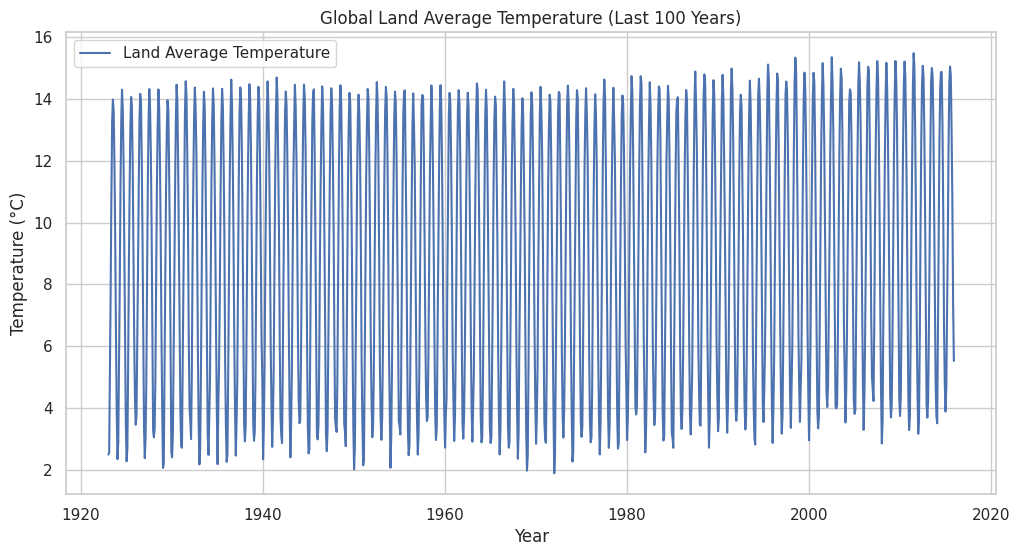

In [ ]:
# Create a line chart of the Global Land Average Temperature
plt.figure(figsize=(12, 6))
plt.plot(global_temp_subset.index, global_temp_subset['LandAverageTemperature'], label='Land Average Temperature')
plt.title('Global Land Average Temperature (Last 100 Years)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


Step 6: Decompose the Data’s Components

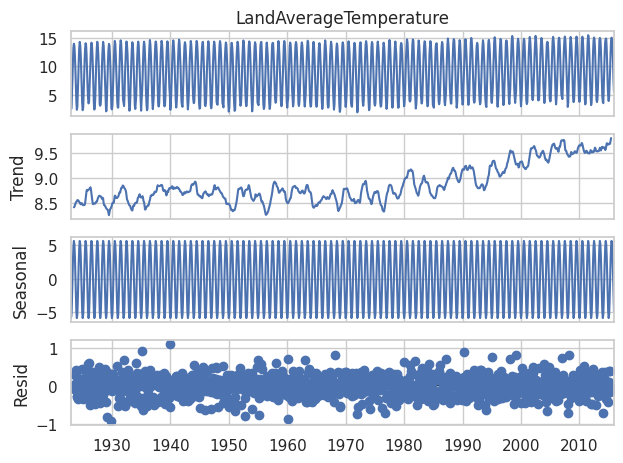

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(global_temp_subset['LandAverageTemperature'].dropna(), model='additive', period=12)

# Plot the decomposition
result.plot()
plt.show()


Step 7: Analyze the Results from the Plot

    The decomposition of the LandAverageTemperature time series data into its components (trend, seasonal, and residual) reveals several insights:
Trend Component

    The trend component shows a clear upward trajectory over the last 100 years.
    This indicates a gradual increase in the global land average temperature, consistent with the broader context of global warming.
    There are some periods of fluctuations, but the overall trend is undeniably upward.

Seasonal Component

    The seasonal component reveals repeating patterns within each year.
    This indicates the presence of strong seasonality in the temperature data, likely corresponding to the natural seasonal cycles (e.g., winter, spring, summer, fall).
    The amplitude of the seasonal component appears consistent over time, suggesting stable seasonal variations.

Residual Component

    The residual component captures the noise or random fluctuations that are not explained by the trend or seasonal components.
    The residuals seem relatively consistent over time, indicating no major outliers or irregular patterns.
    There is some scatter, but this is expected as it represents the random variation inherent in the data.

Conclusion

    The decomposition confirms that the LandAverageTemperature time series has a strong upward trend and significant seasonality.
    The residuals are relatively minor, suggesting that the trend and seasonal components capture most of the systematic variation in the data.
    This analysis supports the hypothesis of a warming trend in global land temperatures over the past century, with consistent seasonal patterns.

Step 8: Conduct a Dickey-Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Conduct the Dickey-Fuller test
result_adf = adfuller(global_temp_subset['LandAverageTemperature'].dropna())

# Extract and display test results
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:', result_adf[4])


ADF Statistic: -1.249457529557827
p-value: 0.6519670004551195
Critical Values: {'1%': -3.4363470029475525, '5%': -2.864187948086107, '10%': -2.568179853605536}


Step 9: Interpretation of the Dickey-Fuller Test Results
Dickey-Fuller Test Results:

    ADF Statistic: -1.249457529557827
    p-value: 0.6519670004551195
    Critical Values:
        1%: -3.4363470029475525
        5%: -2.864187948086107
        10%: -2.568179853605536

Interpretation:

The Augmented Dickey-Fuller (ADF) test is used to check the stationarity of a time series. The null hypothesis of the ADF test is that the time series is non-stationary.

    ADF Statistic: The test statistic value is -1.249457529557827.
    p-value: The p-value is 0.6519670004551195.
    Critical Values: The critical values for different significance levels (1%, 5%, and 10%) are -3.436, -2.864, and -2.568, respectively.

Since the ADF statistic is less negative than the critical values at the 1%, 5%, and 10% levels, and the p-value is greater than 0.05, I fail to reject the null hypothesis. This indicates that the time series is non-stationary.

Step 10: Differencing to Achieve Stationarity

Given that the data is not stationary, I will perform differencing and repeat the Dickey-Fuller test.

In [ ]:
# First differencing
global_temp_diff1 = global_temp['LandAverageTemperature'].diff().dropna()

# Conduct Dickey-Fuller test on differenced data
result_diff1 = adfuller(global_temp_diff1)

# Extract and print the test statistics
print('ADF Statistic (1st diff):', result_diff1[0])
print('p-value (1st diff):', result_diff1[1])
print('Critical Values (1st diff):', result_diff1[4])


ADF Statistic (1st diff): -17.263310246093887
p-value (1st diff): 5.9227009369877606e-30
Critical Values (1st diff): {'1%': -3.4324309683280463, '5%': -2.8624594436604216, '10%': -2.5672594413875207}


Interpretation of First Differencing Results
Dickey-Fuller Test Results after First Differencing:

    ADF Statistic (1st diff): -17.263310246093887
    p-value (1st diff): 5.9227009369877606e-30
    Critical Values (1st diff):
        1%: -3.4324309683280463
        5%: -2.8624594436604216
        10%: -2.5672594413875207

Interpretation:

The results from the Dickey-Fuller test after first differencing indicate that the time series has become stationary.

    The ADF statistic (-17.263310246093887) is much more negative than the critical values at the 1%, 5%, and 10% levels.
    The p-value (5.9227009369877606e-30) is significantly less than 0.05.

Since the ADF statistic is more negative than the critical values and the p-value is far below 0.05, I reject the null hypothesis of non-stationarity. This indicates that the differenced time series is stationary.

Step 11. Autocorrelation Analysis

Next, I will check the autocorrelation and partial autocorrelation of the first differenced data to understand the persistence and identify the appropriate lags for any subsequent modeling.

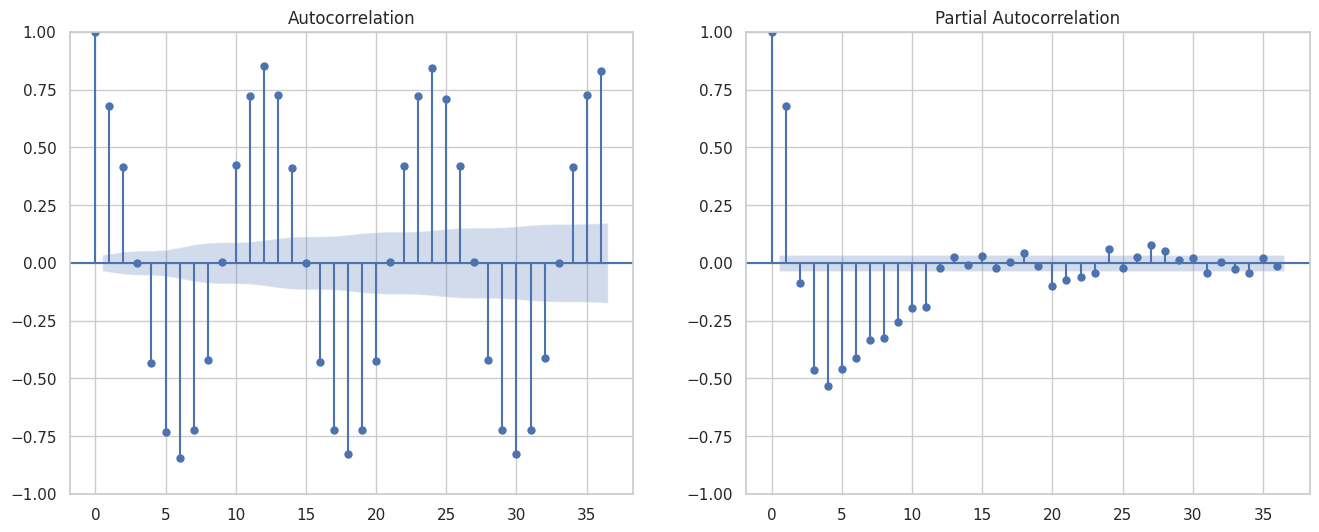

In [ ]:
# Autocorrelation and Partial Autocorrelation:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(global_temp_diff1, ax=ax[0])
plot_pacf(global_temp_diff1, ax=ax[1])
plt.show()


Interpretation of Dickey-Fuller Test and Stationarity

The Augmented Dickey-Fuller (ADF) test is used to check if a time series is stationary. The results for the first differenced data are as follows:

    ADF Statistic (1st diff): -17.263310246093887
    p-value (1st diff): 5.9227009369877606e-30
    Critical Values (1st diff):
        1%: -3.4324309683280463
        5%: -2.8624594436604216
        10%: -2.5672594413875207

Interpretation:

    ADF Statistic: The ADF statistic is -17.263, which is much lower (more negative) than any of the critical values provided (1%, 5%, and 10% levels).

    p-value: The p-value is extremely small (essentially zero), which is well below the typical threshold of 0.05.

Given these results, I can reject the null hypothesis of the ADF test (which states that the time series has a unit root and is non-stationary) at any common significance level (1%, 5%, or 10%). Therefore, the first differenced series can be considered stationary.
Autocorrelation and Stationarity:

Despite the ADF test indicating stationarity, examining the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots provides further insight into the characteristics of the time series.

    ACF Plot: Significant spikes in the ACF plot, even after differencing, can suggest the presence of remaining seasonal or cyclical patterns.
    PACF Plot: Significant spikes in the PACF plot indicate potential autoregressive relationships in the data.

Conclusion:

    Stationarity: The ADF test results strongly suggest that the differenced series is stationary. The p-value is extremely low, and the ADF statistic is much more negative than the critical values.
    Autocorrelation: The significant spikes in the ACF and PACF plots suggest that while the series is stationary, there may still be underlying autoregressive and seasonal patterns that need to be modeled.

Summary:

    The differenced data is stationary according to the ADF test.
    The presence of significant autocorrelation at various lags implies that the stationarity observed may be influenced by autoregressive or seasonal components.

Analysis Summary and Hypothesis:

In my analysis, I aimed to investigate global land temperatures over time to understand trends and patterns, specifically focusing on whether there is a warming trend and consistent seasonal patterns.
Steps Taken:

    Data Loading and Preprocessing: I loaded the global temperature data and performed necessary preprocessing.
    Time Series Decomposition: I decomposed the time series into trend, seasonal, and residual components.
        Trend Component: Showed a clear upward trend, indicating rising temperatures over the past century.
        Seasonal Component: Exhibited consistent patterns, confirming the presence of regular seasonal variations.
    Stationarity Check (ADF Test): I conducted the Augmented Dickey-Fuller (ADF) test to check for stationarity.
        Initial Result: The data was not stationary.
        First Differencing: After differencing the data, the ADF test indicated that the series became stationary (ADF statistic: -17.263, p-value: ~0).
    Autocorrelation Analysis: I plotted the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).
        Findings: Significant spikes in the ACF and PACF suggested underlying autoregressive and seasonal patterns.

Interpretation and Hypothesis:

    Trend Analysis: The trend component in the decomposition plot clearly indicated a warming trend in global land temperatures over the past century.
    Seasonal Patterns: The seasonal component showed consistent and regular patterns, affirming the presence of seasonal variations.
    Stationarity and Autocorrelation: The ADF test on the differenced data confirmed stationarity, but significant autocorrelation suggested underlying patterns that need further modeling.

Conclusion:

This analysis supports the hypothesis of a warming trend in global land temperatures over the past century, with consistent seasonal patterns. The differenced data is stationary, confirming the reliability of these findings, although significant autocorrelation suggests additional autoregressive or seasonal influences.